In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CSIKit.util import csitools
from CSIKit.reader import get_reader

In [10]:
def plot_heatmap(csi_matrix, timestamps, ax):

        csi_matrix = np.transpose(csi_matrix)

        x_label = "Time (s)"
        try:
            x = timestamps
            x = [timestamp - x[0] for timestamp in x]
        except AttributeError as e:
            # No timestamp in frame. Likely an IWL entry.
            # Will be moving timestamps to CSIData to account for this.
            x = [0]

        if sum(x) == 0:
            # Some files have invalid timestamp_low values which means we can't plot based on timestamps.
            # Instead we'll just plot by frame count.

            xlim = csi_matrix.shape[1]

            x_label = "Frame No."
        else:
            xlim = max(x)

        limits = [0, xlim, 1, csi_matrix.shape[0]]

        # _, ax = plt.subplots()
        im = ax.imshow(csi_matrix, cmap="jet", extent=limits, aspect="auto")

        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.ax.set_ylabel("Amplitude (dBm)")

        ax.set_xlabel(x_label)
        ax.set_ylabel("Subcarrier Index")

        # plt.title("CSI Amplitude Heatmap Plot")

        # plt.show()

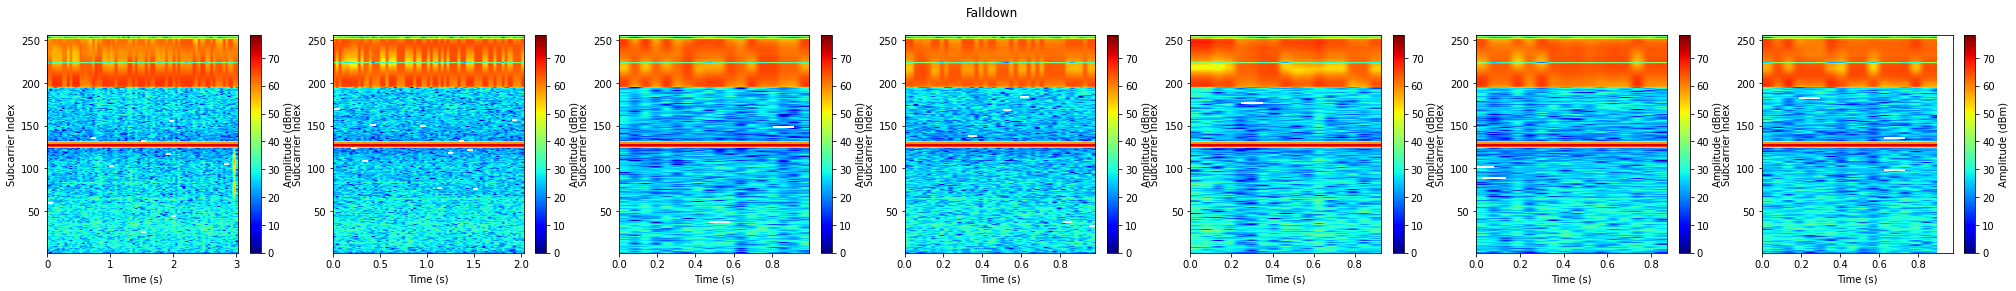

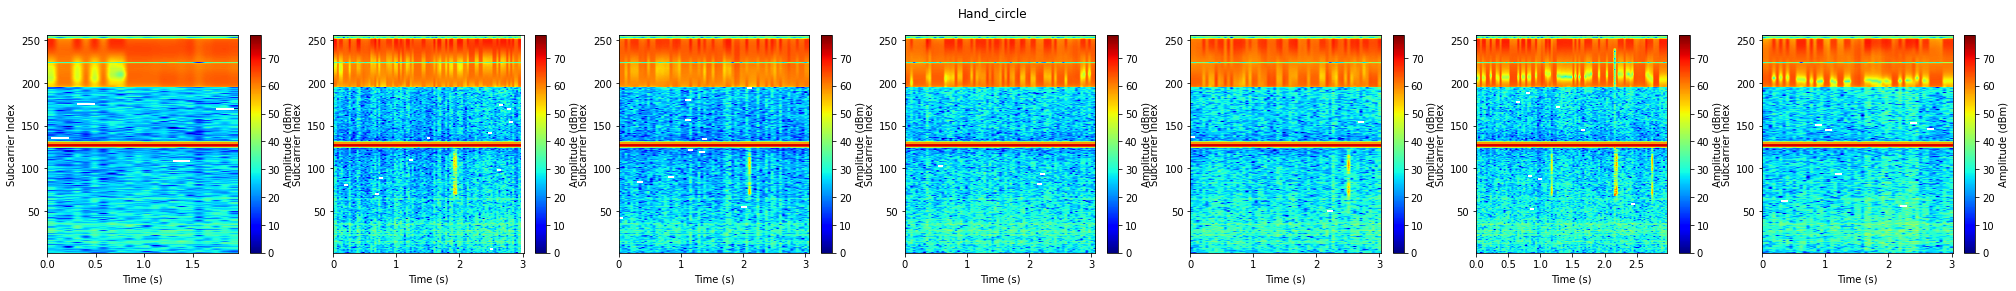

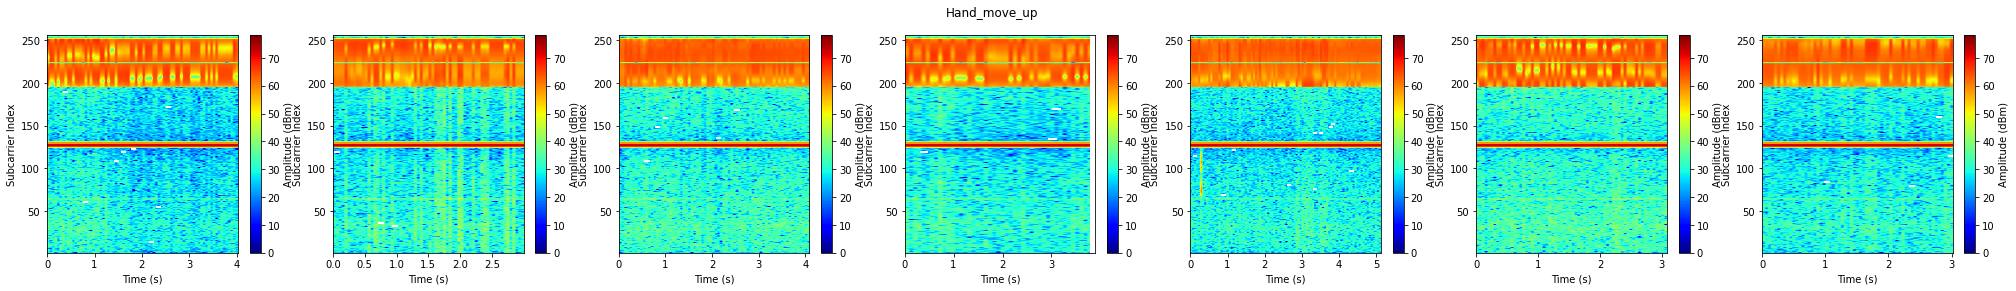

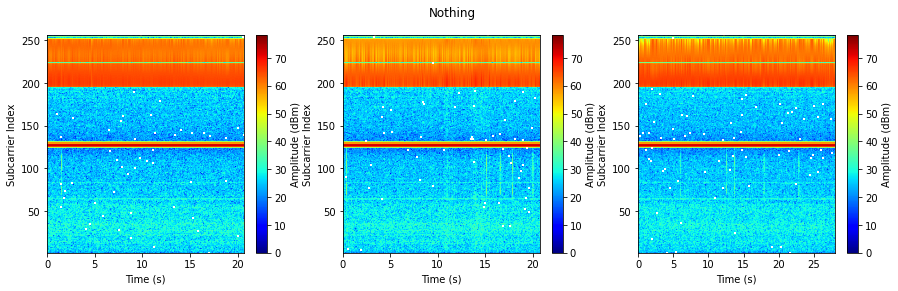

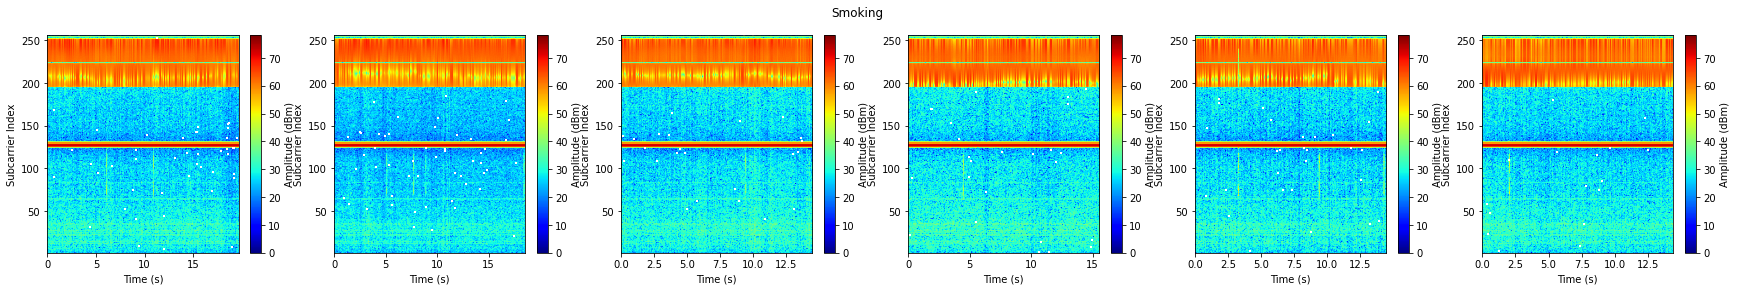

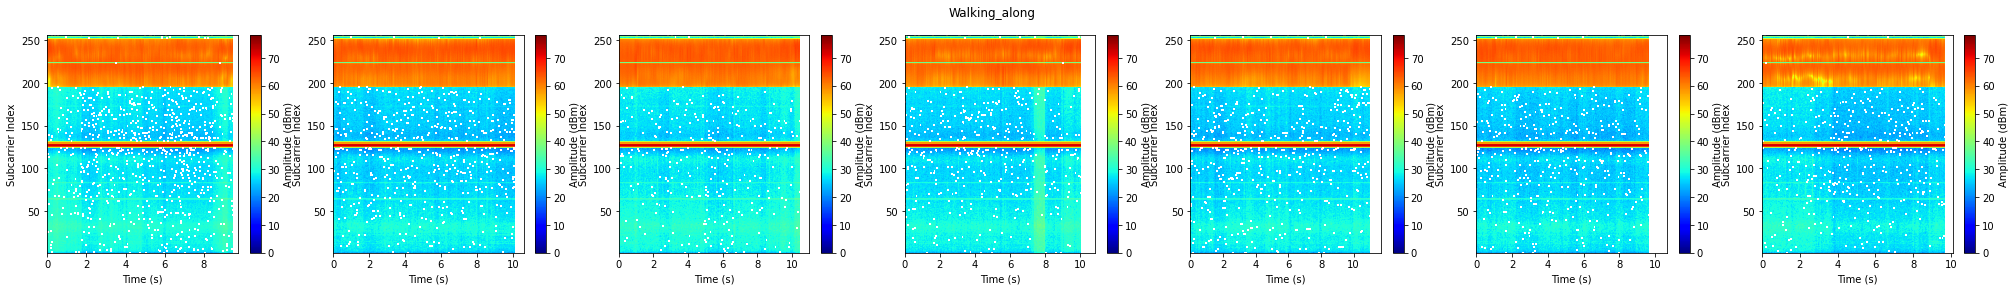

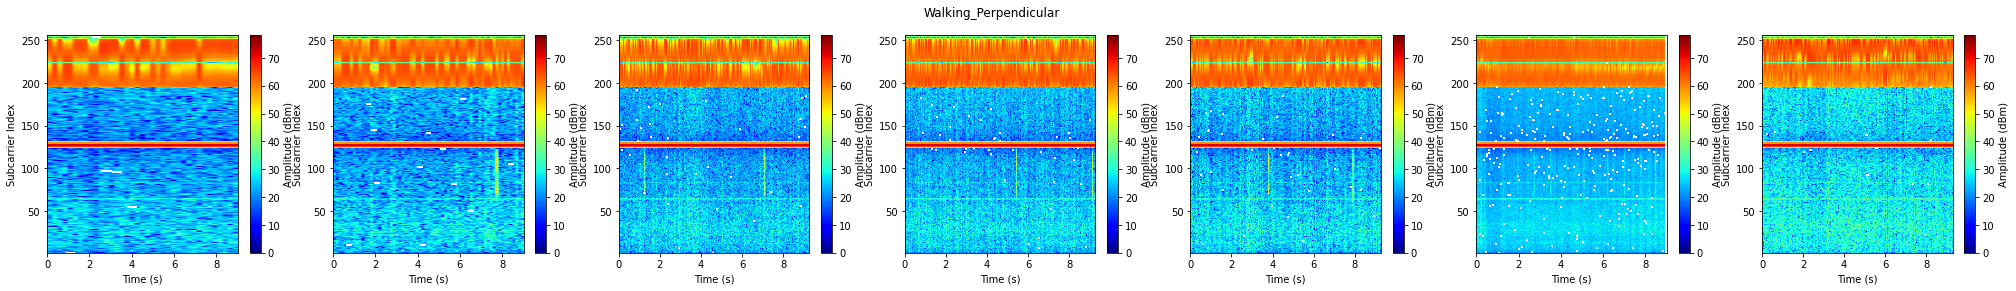

In [12]:
path = os.getcwd() + "\csi_data_pcap"
f = os.listdir(path)
lst = (f[:7], f[7:14], f[14:21], f[21:24], f[24:30], f[30:37], f[37:44])


for act in lst:
    fig, axs = plt.subplots(1, len(act), figsize=(5*len(act), 4))
    fig.suptitle(act[1][:-7])

    for i, filename in enumerate(act):
        fpath = os.path.join(path, filename)
        my_reader = get_reader(fpath)
        csi_data = my_reader.read_file(fpath)
        csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

        csi_matrix_first = csi_matrix[:, :, 0, 0]
        csi_matrix_squeezed = np.squeeze(csi_matrix_first)
        
        plot_heatmap(csi_matrix_squeezed, csi_data.timestamps, axs[i])
    plt.show()

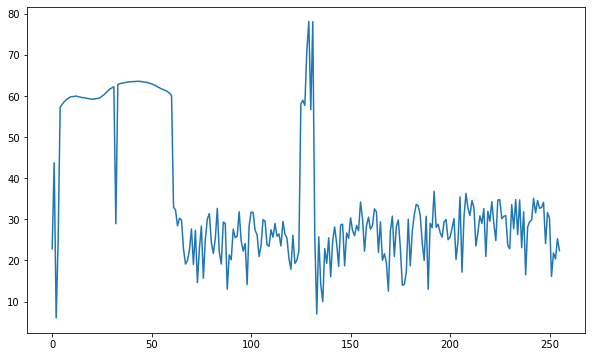

In [5]:
path = os.getcwd() + "\csi_data_csv"
filename = os.listdir(path)[0]
fpath = os.path.join(path, filename)
data = pd.read_csv(fpath)

pd.DataFrame(data.iloc[0]).plot.line(figsize=[10, 6], legend=False)
plt.show()